In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
cd gdrive/MyDrive/pet_datasets/video_capture_yolo_dataset/


/content/gdrive/MyDrive/pet_datasets/video_capture_yolo_dataset


In [5]:
ls

datasets/  data.yaml  runs/  yolov8s.pt


In [6]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.1/877.1 kB 29.1 MB/s eta 0:00:00


In [8]:
!yolo task=detect mode=train model=yolov8s.pt imgsz=680 data=data.yaml epochs=20 batch=15 name=yolov8s_20_last_exp

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=20, time=None, patience=100, batch=15, imgsz=680, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_20_last_exp, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

In [10]:
!yolo task=detect mode=val model=runs/detect/yolov8s_20_last_exp/weights/best.pt name=yolov8s_eval data=data.yaml imgsz=680


WARNING ⚠️ imgsz=[680] must be multiple of max stride 32, updating to [704]
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/gdrive/MyDrive/pet_datasets/video_capture_yolo_dataset/datasets/val/labels.cache... 50 images, 100 backgrounds, 0 corrupt: 100% 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:04<00:00,  2.37it/s]
                   all        150         74       0.97      0.986      0.991      0.682
Speed: 2.1ms preprocess, 10.7ms inference, 0.0ms loss, 8.5ms postprocess per image
Results saved to runs/detect/yolov8s_eval
💡 Learn more at https://docs.ultralytics.com/modes/val


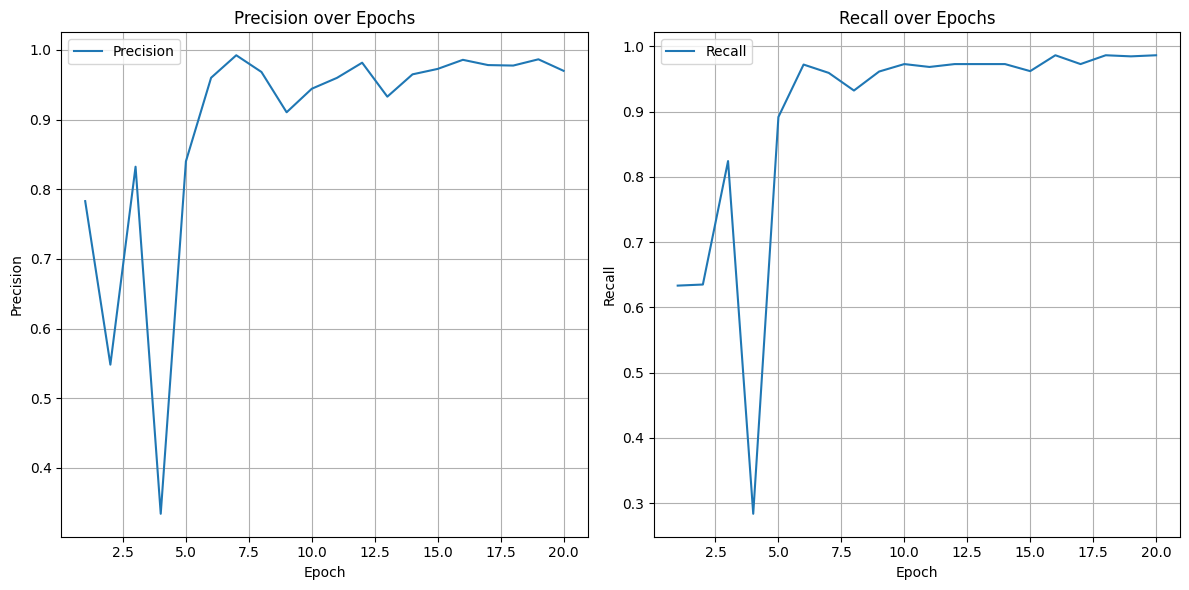

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

metrics_path = 'runs/detect/yolov8s_20_last_exp/results.csv'
metrics_df = pd.read_csv(metrics_path)


fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].plot(metrics_df['epoch'], metrics_df['metrics/precision(B)'], label='Precision')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Precision')
ax[0].set_title('Precision over Epochs')
ax[0].grid()
ax[0].legend()

ax[1].plot(metrics_df['epoch'], metrics_df['metrics/recall(B)'], label='Recall')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Recall')
ax[1].set_title('Recall over Epochs')
ax[1].grid()
ax[1].legend()


plt.tight_layout()
plt.show()

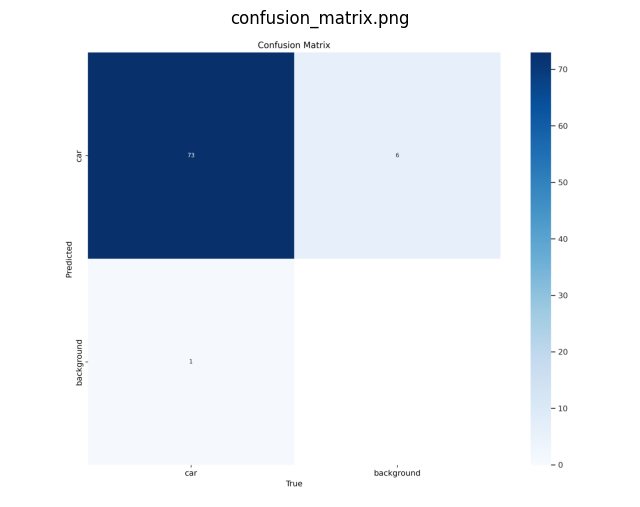

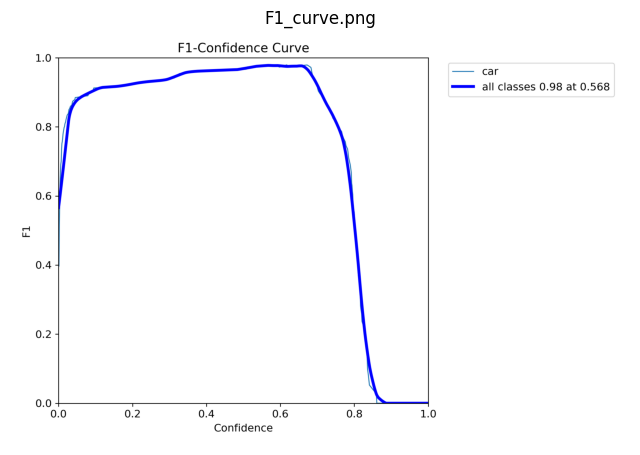

In [21]:
results_dir = 'runs/detect/yolov8s_20_last_exp/'


images = ['confusion_matrix.png', 'F1_curve.png']

for img_file in images:
    img_path = os.path.join(results_dir, img_file)
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_file)
        plt.show()
    else:
        print(f'Файл {img_file} не найден в {results_dir}')